In [1]:
from lensid.utils.ml_utils import *

2021-09-02 23:00:22.184107: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-02 23:00:22.184144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
indir = 'O3a_psd'
base_dir = '/home/srashti.goyal/strong-lensing-ml/' #CIT
#base_dir = '/home1/srashti.goyal/lensid/' #Alice

In [3]:
# ML QT and skymap predictions

# combine ML QT with ML sky

In [5]:
df_sky = pd.read_csv(base_dir+'data/dataframes/'+str(indir)+'/ML_skymaps.csv',index_col=0)
df_qts = pd.read_csv(base_dir+'data/dataframes/'+str(indir)+'/ML_QTs.csv',index_col=0)

In [6]:
df_test=pd.merge(df_sky, df_qts, on=["img_0", "img_1","Lensing"])
df_test=df_test.rename(columns={'xgb_dense_QTS_0':'xgb_dense_QTS'})
df_test['densnet_xgbsky_bayestar_mul'] = df_test['xgb_dense_QTS']*df_test['xgb_pred_bayestar_skymaps']
#df_test['densnet_xgbsky_pe_mul'] = df_test['xgb_dense_QTS']*df_test['xgb_pred_pe_skymaps']
df_test

,Unnamed: 0.1,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,xgb_pred_bayestar_skymaps,dense_H1,dense_L1,dense_V1,xgb_dense_QTS,densnet_xgbsky_bayestar_mul
0,0,349_7964,869_20610,0,4.072401e-01,3.283530e-03,1.836408e-02,0.124739,0.000044,0.420908,0.345595,0.420908,0.013896,6.077419e-07
1,1,87_1712,444_9774,0,6.058658e-01,4.885025e-03,3.262989e-02,0.112392,0.000093,0.988433,0.348789,0.988433,0.090588,8.454442e-06
2,2,84_1646,958_22911,0,1.213890e-01,9.787452e-04,2.333766e-02,0.189109,0.000007,0.118847,0.395948,0.118847,0.009512,6.214978e-08
3,3,811_19205,828_19597,0,1.845745e-01,1.488203e-03,1.196060e-01,0.126833,0.000005,0.789831,0.001575,0.789831,0.001976,1.049568e-08
4,4,321_7163,775_18224,0,1.964691e-69,1.584108e-71,2.648536e-69,0.155190,0.000004,0.516854,0.997218,0.516854,0.021308,8.575646e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499495,499495,306_6850,456_10105,0,2.363801e-04,1.905905e-06,4.057649e-05,0.117501,0.000006,0.273736,0.023459,0.273736,0.013843,8.831075e-08
499496,499496,482_10680,724_17211,0,4.098724e-05,3.304753e-07,3.611864e-05,0.136351,0.000005,0.957928,0.972713,0.957928,0.072818,3.410517e-07
499497,499497,142_2958,228_5190,0,1.269400e-02,1.023503e-04,1.518596e-03,0.144315,0.000004,0.382746,0.218096,0.382746,0.011665,4.694576e-08
499498,499498,159_3507,747_17619,0,1.659888e-02,1.338349e-04,3.711476e-03,0.118080,0.000006,0.676317,0.997748,0.676317,0.033912,2.163488e-07


In [8]:
tag='_git'
df_test.to_csv(base_dir+'data/dataframes/'+str(indir)+'/ML_combined'+tag+'.csv')

# Compare to the unlensed test set(haris et. al.)

In [15]:
O3a_ml_df = pd.read_csv(base_dir+'data/dataframes/O3a_psd/ML_combined'+tag+'.csv',index_col=0)
test_ml_df = pd.read_csv(base_dir+'data/dataframes/test/ML_combined_kaggle.csv')
O3a_ml_df_analytical = pd.read_csv(base_dir+'data/dataframes/O3a_inj/ML_QTs_O3a_inj.csv',index_col=1)

In [16]:
test_ml_df_ul = test_ml_df[test_ml_df['Lensing'] == 0]
test_ml_df_l = test_ml_df[test_ml_df['Lensing'] == 1]

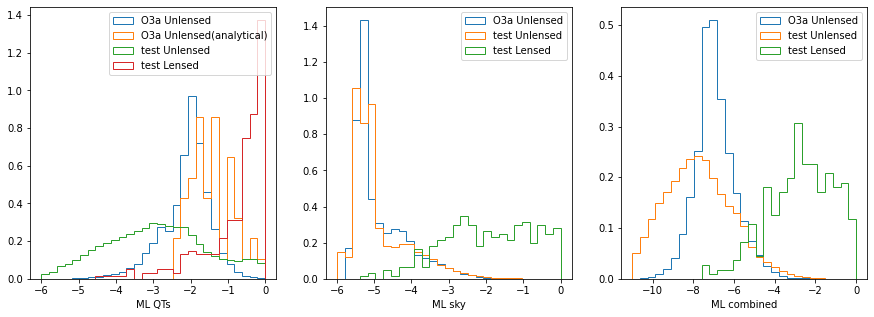

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.xlabel('ML QTs')
bins=np.linspace(-6,0,30)
ml_stat='xgb_dense_QTS_0'
#plt.ylim(-100,1e3)
plt.hist(np.log10(O3a_ml_df[ml_stat[:-2]]),bins=bins,label='O3a Unlensed', histtype='step',density=True)
plt.hist(np.log10(O3a_ml_df_analytical[ml_stat[:-2]]),bins=bins,label='O3a Unlensed(analytical)', histtype='step',density=True)

plt.hist(np.log10(test_ml_df_ul[ml_stat]),bins=bins,label='test Unlensed', histtype='step',density=True)
plt.hist(np.log10(test_ml_df_l[ml_stat]),bins=bins,label='test Lensed', histtype='step',density=True)
plt.legend()

plt.subplot(132)
plt.xlabel('ML sky')
bins=np.linspace(-6,0,30)
ml_stat='xgb_pred_bayestar_skymaps'
#plt.ylim(-100,1e3)
plt.hist(np.log10(O3a_ml_df[ml_stat]),bins=bins,label='O3a Unlensed', histtype='step',density=True)
plt.hist(np.log10(test_ml_df_ul[ml_stat]),bins=bins,label='test Unlensed', histtype='step',density=True)
plt.hist(np.log10(test_ml_df_l[ml_stat]),bins=bins,label='test Lensed', histtype='step',density=True)
plt.legend()

plt.subplot(133)
plt.xlabel('ML combined')
bins=np.linspace(-11,0,30)
ml_stat='densnet_xgbsky_bayestar_mul_0'

#plt.ylim(-100,1e3)
plt.hist(np.log10(O3a_ml_df[ml_stat[:-2]]),bins=bins,label='O3a Unlensed', histtype='step',density=True)
plt.hist(np.log10(test_ml_df_ul[ml_stat]),bins=bins,label='test Unlensed', histtype='step',density=True)
plt.hist(np.log10(test_ml_df_l[ml_stat]),bins=bins,label='test Lensed', histtype='step',density=True)
plt.legend()
plt.show()

# Compare with BLU statistic for O3a injections

In [18]:
O3a_ml_df = pd.read_csv(base_dir+'data/dataframes/O3a_psd/ML_combined'+tag+'.csv',index_col=0)
blu_haris_O3a_inj = pd.read_csv(base_dir+'data/dataframes/O3a_haris/blu_injections.csv',index_col=0)
blu_haris_O3a_inj['Lensing'] = 0
blu_haris_O3a_inj.tail()

,img_0,img_1,blu,rlu,delta_t,Lensing
483675,154_3332,287_6478,0.0,0.0906,0.611,0
483676,555_12168,356_8141,0.0,0.0358,0.147,0
483677,204_4567,368_8296,0.0,0.6480,4.520,0
483678,101_2087,113_2381,0.0,0.0112,0.000,0
483679,722_17163,383_8492,0.0,0.0182,0.033,0


/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


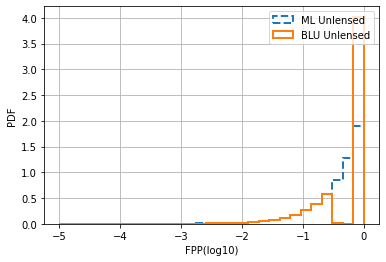

In [19]:
ml_stat= 'densnet_xgbsky_bayestar_mul'
blu_stat='blu'
O3a_ml_df[ml_stat+'_fpp']=get_fars(O3a_ml_df,ml_stat,O3a_ml_df,ml_stat)
blu_haris_O3a_inj[blu_stat+'_fpp']=get_fars(blu_haris_O3a_inj,blu_stat,blu_haris_O3a_inj,blu_stat)
bins=np.linspace(-5,0,30)
plt.hist(np.log10(O3a_ml_df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=2,ls='dashed')
plt.hist(np.log10(blu_haris_O3a_inj[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C1',lw=2)
plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


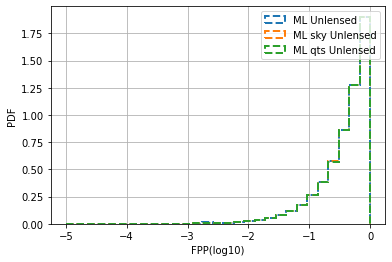

In [20]:
bins=np.linspace(-5,0,30)

ml_stat= 'densnet_xgbsky_bayestar_mul'
O3a_ml_df[ml_stat+'_fpp']=get_fars(O3a_ml_df,ml_stat,O3a_ml_df,ml_stat)
plt.hist(np.log10(O3a_ml_df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,lw=2,ls='dashed')

ml_stat= 'xgb_pred_bayestar_skymaps'
O3a_ml_df[ml_stat+'_fpp']=get_fars(O3a_ml_df,ml_stat,O3a_ml_df,ml_stat)
plt.hist(np.log10(O3a_ml_df[ml_stat+'_fpp']),bins=bins,label='ML sky Unlensed', histtype='step',density=True,lw=2,ls='dashed')

ml_stat= 'xgb_dense_QTS'
O3a_ml_df[ml_stat+'_fpp']=get_fars(O3a_ml_df,ml_stat,O3a_ml_df,ml_stat)
plt.hist(np.log10(O3a_ml_df[ml_stat+'_fpp']),bins=bins,label='ML qts Unlensed', histtype='step',density=True,lw=2,ls='dashed')

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()